In [1]:
# Just an example of how to plot some results
library(data.table)
library(ggplot2)
library(scales)
library(Hmisc)
theme_set(theme_bw(20))
library(tidyr)
library(dplyr)
library(plyr)

Warning message:
“package ‘data.table’ was built under R version 3.6.3”
Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


A

In [2]:
setwd("/home/yuhaodu/workplace_gender/R/")

In [3]:
read_file <- function(file_name){
res_dir = file_name
print(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0("../",res_dir),
                                        pattern="turn_output_[0-9].tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0("../",res_dir,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}





In [4]:
## 


RewardLess <- read_file('RewardLess')
PenaltyMore <- read_file('PenaltyMore')
allBias <- read_file('allBias')
noBias <- read_file('noBias')
MixedRewardLess <- read_file('MixedRewardLess')
MixedPenaltyMore <- read_file('MixedPenaltyMore')
Complain <- read_file('Complain')
allBias <- read_file('allBias')
stretchProject <- read_file('UnfairStretchAssignment')
allBias <- allBias[turn <= 20]

tmp <- rbind(RewardLess,PenaltyMore,noBias,MixedRewardLess,MixedPenaltyMore,Complain,allBias,stretchProject,fill=TRUE)
tmp$type <- factor(tmp$type, 
                   levels = c("noBias","UnfairStretchAssignment","Complain","MixedPenaltyMore",
                              "MixedRewardLess","PenaltyMore","RewardLess","allBias"))


[1] "../RewardLess/turn_output_0.tsv"
[1] "../PenaltyMore/turn_output_0.tsv"
[1] "../allBias/turn_output_0.tsv"
[1] "../noBias/turn_output_0.tsv"
[1] "../MixedRewardLess/turn_output_0.tsv"
[1] "../MixedPenaltyMore/turn_output_0.tsv"
[1] "../Complain/turn_output_0.tsv"
[1] "../allBias/turn_output_0.tsv"
[1] "../UnfairStretchAssignment/turn_output_0.tsv"


In [7]:
tmp$type_name <- mapvalues(tmp$type, c("noBias",
                                       "UnfairStretchAssignment",
                                       "Complain",
                                      "MixedPenaltyMore",
                                      "MixedRewardLess",
                                      "PenaltyMore",
                                      "RewardLess",
                                      "allBias"),
                          c("No Biases",
                            "+ Penalty\nStretch\nProject",
                           "+ Penalty\nNon-Altruism",
                           "+ Penalty\nMixed Group\nFailure",
                           "- Reward\nMixed Group\nSucces",
                           "+ Penalty\nIndividual\nFailure",
                           "- Reward\nIndividual\nSuccess",
                           "All Biases"))

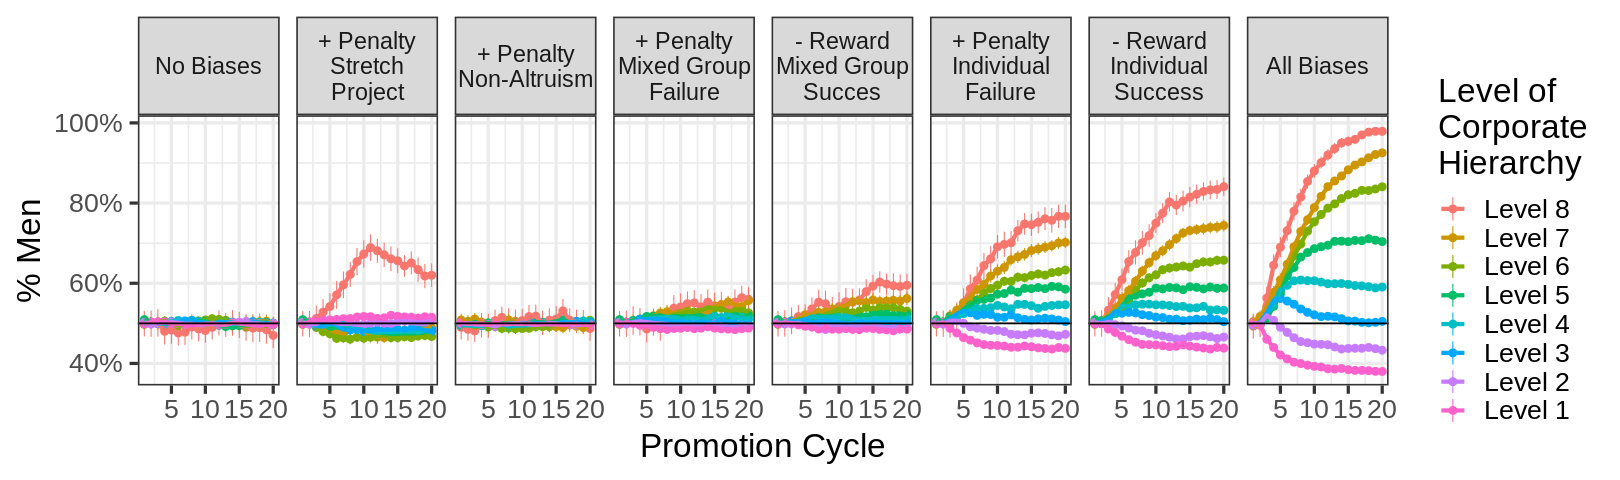

In [11]:
w = 13.5
h=4
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp,aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    facet_grid(~type_name)+ 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=14))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
ggsave('../resultImage/AccBias.pdf',width =w,height=h)


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


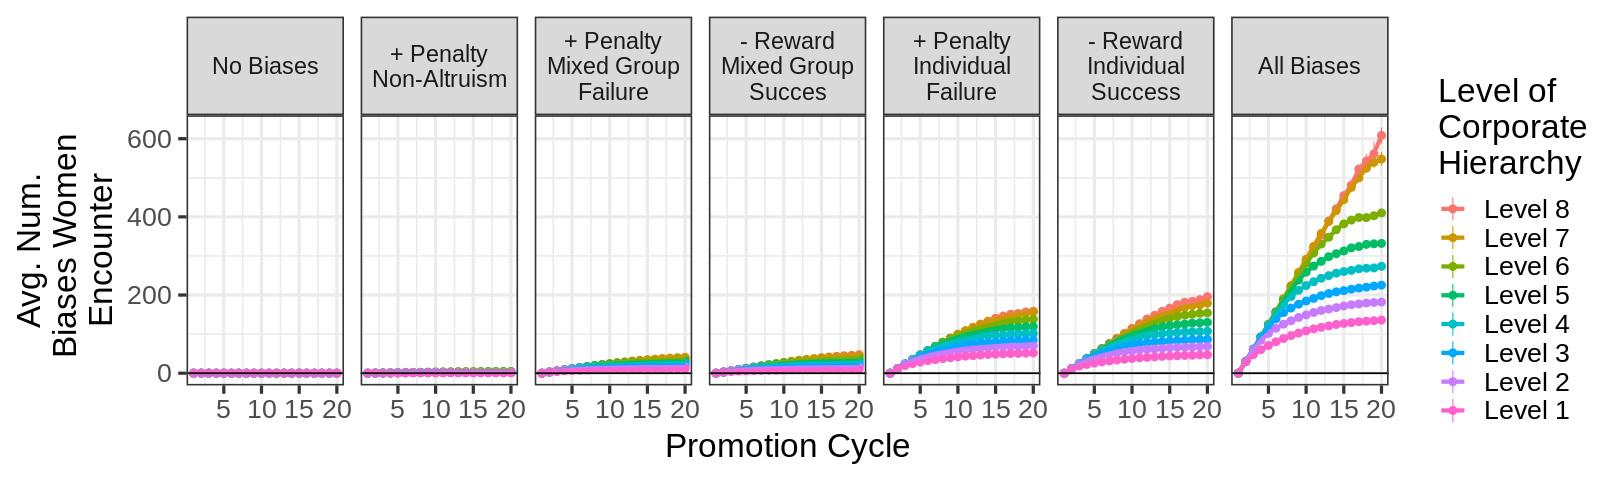

In [12]:
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp[fem_bias!=-1 & type !="UnfairStretchAssignment" ],aes(turn,fem_bias,color=level_iter)) +
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = 0) +
     scale_y_continuous("Avg. Num.\n Biases Women\nEncounter") + 
    xlab("Promotion Cycle")+ 
 facet_grid(~type_name)+ 
scale_color_discrete("Level of\nCorporate\nHierarchy") +
    theme(strip.text.x= element_text(size=14))
p
ggsave('../resultImage/NumBias.pdf',width =w,height=h)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”

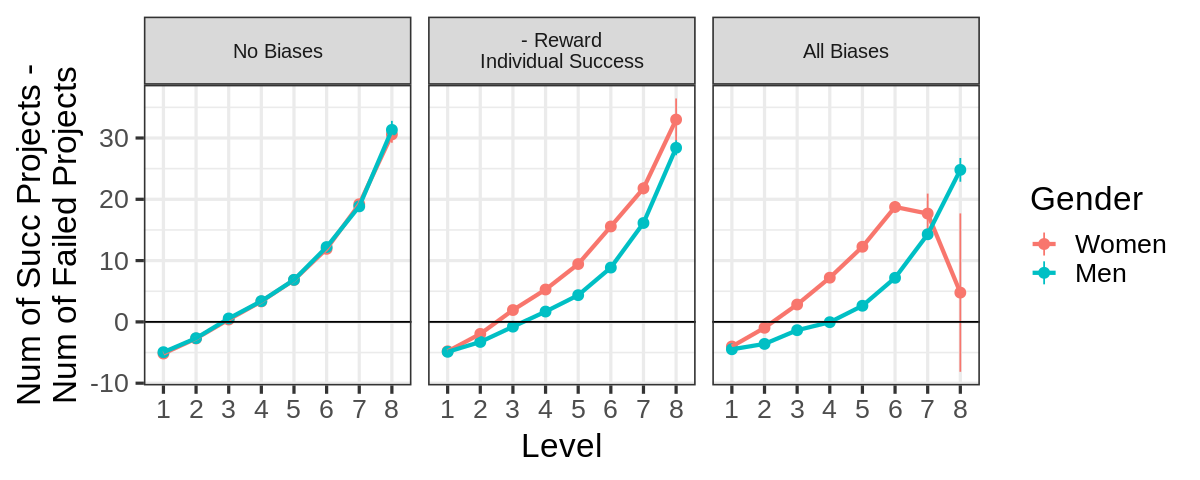

In [129]:
w = 10
h=4
options(repr.plot.width = w, repr.plot.height = h)
tmp <- rbind(RewardLess,noBias,allBias,fill=T)
tmp$type <- factor(tmp$type, levels = c("noBias","RewardLess","allBias"),
                  labels=c("No Biases",
                           "- Reward\nIndividual Success",
                           "All Biases"))
tmp$fem_diff <- tmp$fem_suc - tmp$fem_fail
tmp$male_diff <- tmp$male_suc - tmp$male_fail
tmp$level_iter <- factor(tmp$level_iter,levels=c('Level 1','Level 2','Level 3','Level 4','Level 5',
                                                  'Level 6','Level 7','Level 8'), labels=1:8)
#melt(tmp,id=c('level_iter','type','run_number'),measure=c("fem_diff","male_diff"))[value!=-1]
p <- ggplot(melt(tmp[fem_bias!=-1],id=c('level_iter','type','replication_number','turn'),
                 measure=c("fem_diff","male_diff"))[value!=-1 & turn == 20]) +
 stat_summary(aes(x=level_iter,y=value,color=variable),fun.data="mean_cl_normal") +
stat_summary(aes(x=level_iter,y=value,group=variable,color = variable),fun.y="mean",geom="line",size=1.2) +
    geom_hline(yintercept = 0)+
scale_y_continuous("Num of Succ Projects -\nNum of Failed Projects") + xlab("Level")+
theme(strip.text.x= element_text(size=12))+
facet_grid(~type)+ 
scale_color_discrete("Gender", labels=c("Women","Men")) 
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
ggsave('/home/kjoseph/gender_bias_img/DiffBias.pdf',width =w,height=h)

[1] "../WithDownwardCausation/turn_output_0.tsv"
[2] "../WithDownwardCausation/turn_output_1.tsv"
[3] "../WithDownwardCausation/turn_output_2.tsv"
[4] "../WithDownwardCausation/turn_output_3.tsv"
[5] "../WithDownwardCausation/turn_output_4.tsv"
[6] "../WithDownwardCausation/turn_output_5.tsv"
[1] "../WithoutDownwardCausation/turn_output_0.tsv"


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”

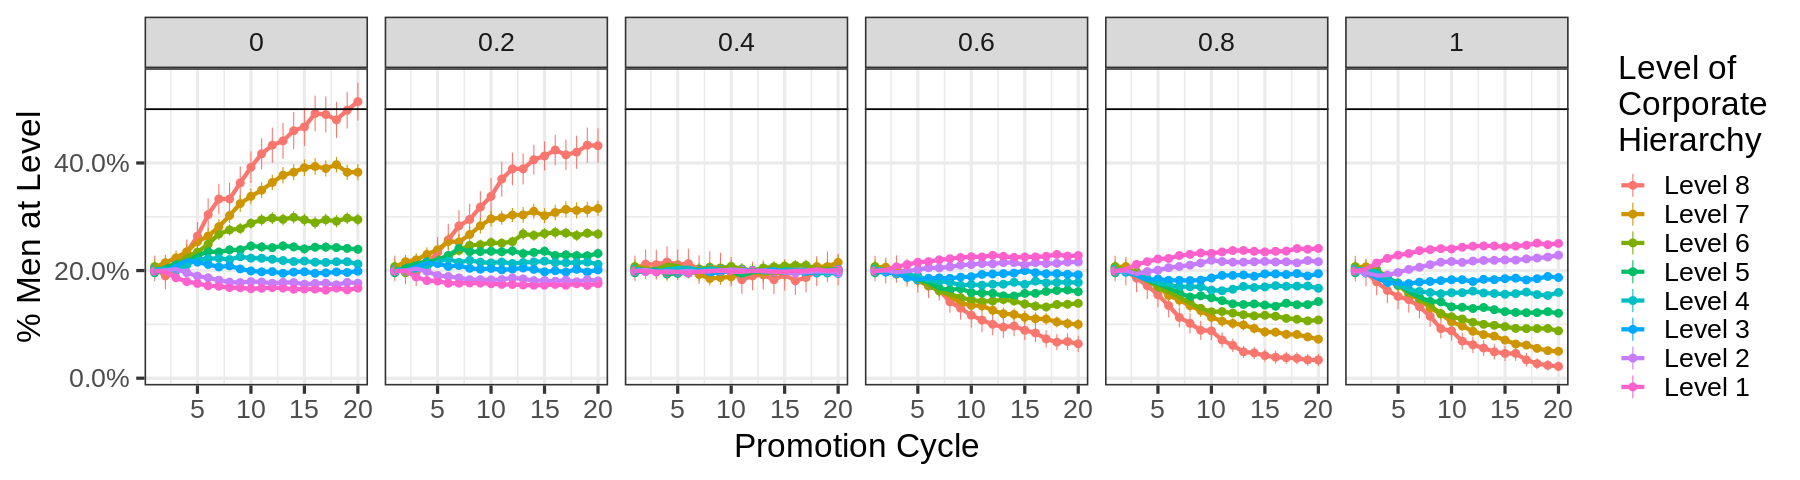

In [143]:
w = 15
h= 4
options(repr.plot.width = w, repr.plot.height = h)
weight <- read_file('WithDownwardCausation')
weight2 <- read_file('WithoutDownwardCausation')
weight2$weight = as.character(weight2$weight)
weight2$weight = 'without'
# weight2$weight = 'without'
weight = rbind(weight,weight2,fill= TRUE)
# Second Plot
p <- ggplot(weight[weight != "without"],aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2) + 
    geom_hline(yintercept = .5) +
    scale_y_continuous("% Men at Level", labels=percent) + 
    xlab("Promotion Cycle") +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    facet_grid(~weight) 
# p <- p + theme(axis.title.y = element_text(size=12))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
ggsave('/home/kjoseph/gender_bias_img/ImpactOfWeight.pdf',width =w,height=h)

In [ ]:
h=15
w=15
intervention <- read_file('Intervention')
intervention[ , promotion_interv := factor(promotion_intervention_span,
                                          levels=c('[168, 240]',
                                                   '[168, 312]',
                                                   '[168, 384]'),
                                          labels=c("3 Prom. Cycles","6 Prom. Cycles","9 Prom. Cycles"))]
intervention[ , promotion_norm := factor(promotion_intervention_norm,
                                          levels=c(0.4,
                                                   0.7,
                                                   1),
                                          labels=c("Moderate\nExternal Norms",
                                                   "Low\nExternal Norms",
                                                   "No\nExternal Norms"))]
g <- ggplot(intervention[turn <=75],aes(x=turn,y=n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data = "mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y='mean',geom='line',size=1.2) + 
    geom_hline(yintercept=0.5) +
    scale_y_continuous("% Men at Level",labels = percent) + 
    xlab("Promotion Cycle") +
    facet_grid(promotion_interv~promotion_norm) +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    geom_vline(xintercept = 7, size=1.2,linetype="dashed",color="darkgrey")
options(repr.plot.width = w, repr.plot.height = h)
g
ggsave('/home/kjoseph/gender_bias_img/Intervention.pdf',width=w,height=h)